In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# EDA

## Let's firstly take a look at our dataset

In [12]:
gaming_data = pd.read_csv('/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv')

# --- 1. Basic Info ---
print(gaming_data.info())
print(gaming_data.describe())
print("Missing values:\n", gaming_data.isnull().sum())
print("Duplicated rows:", gaming_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

### - As we can see, we have 13 columns that contain information about players such as their age, genre of a game they play, their level etc
### - Moreover, our data doesn't contain any null values

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


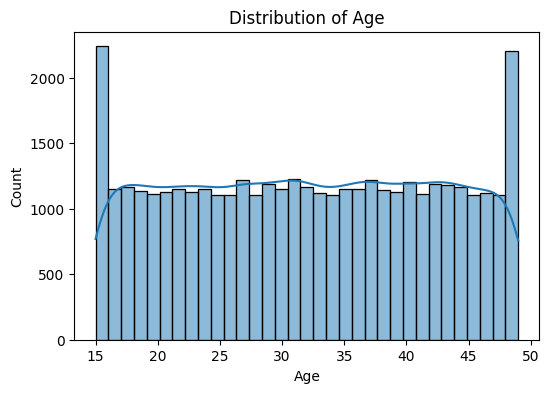

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


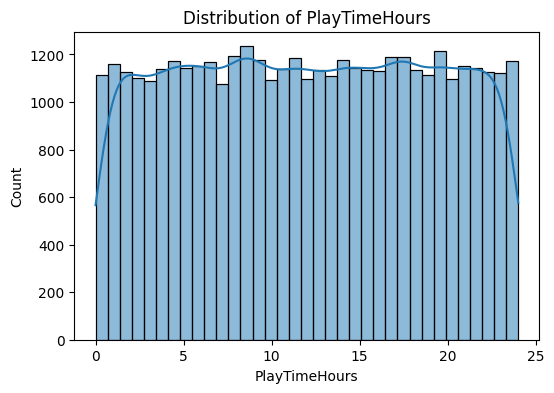

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


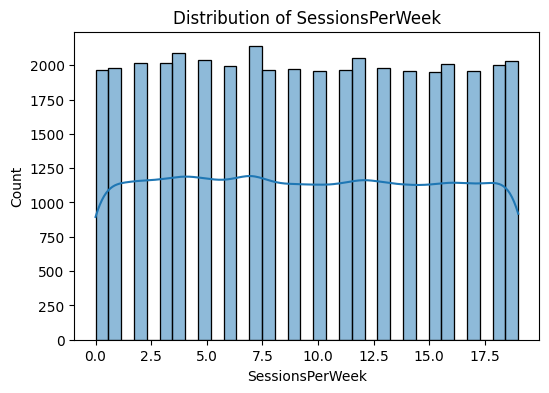

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


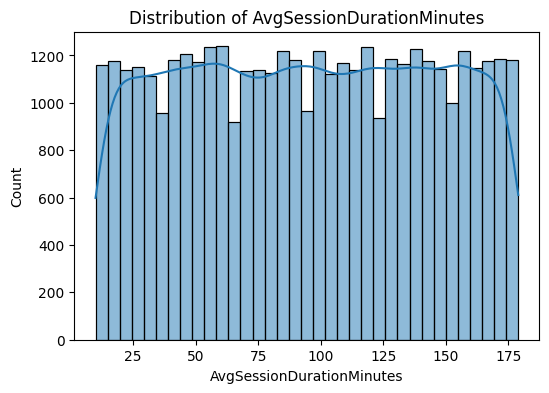

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


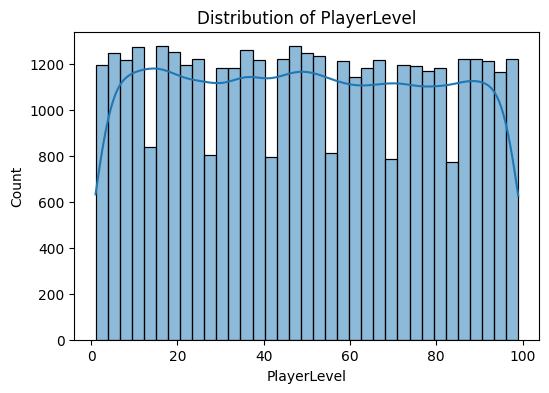

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


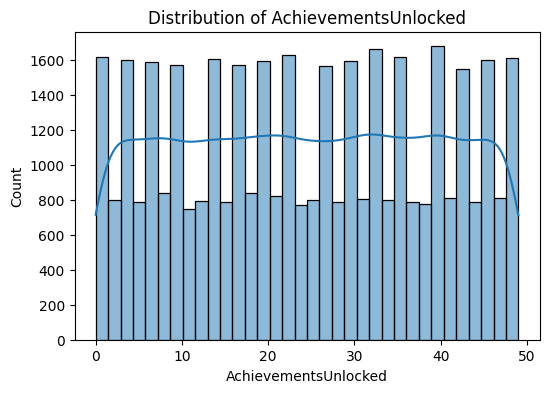

In [4]:
# --- 2. Numeric Distributions ---
num_cols = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(gaming_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

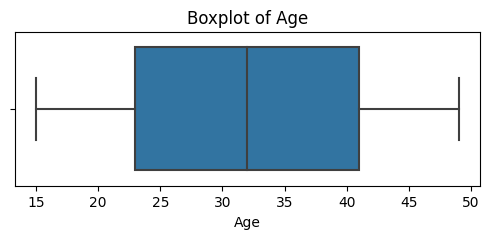

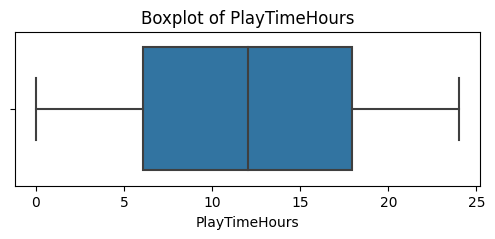

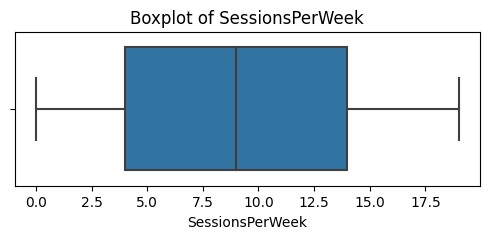

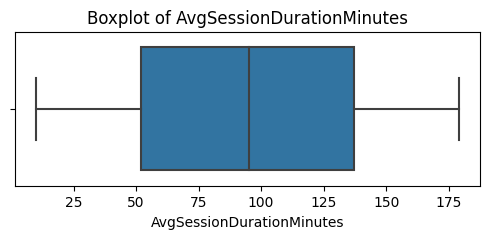

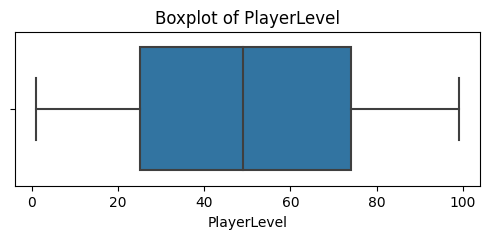

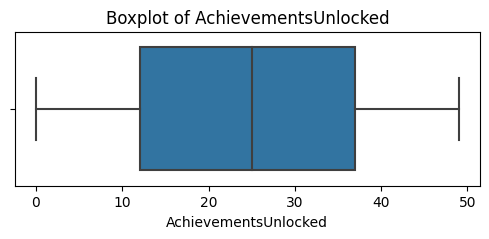

In [5]:
# --- Boxplots ---
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=gaming_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

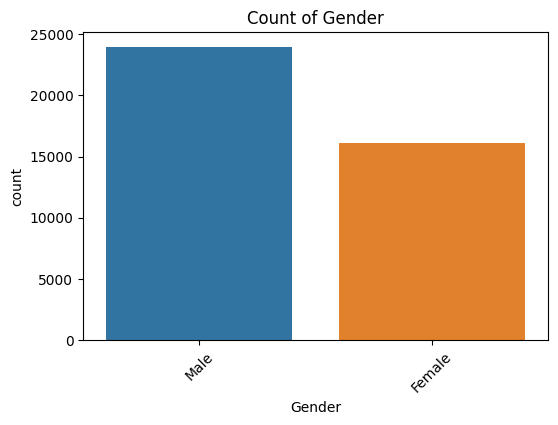

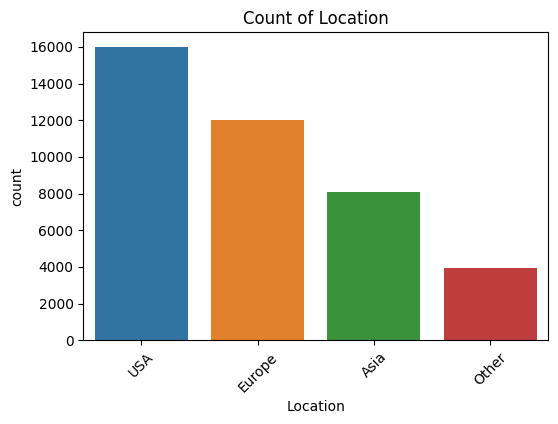

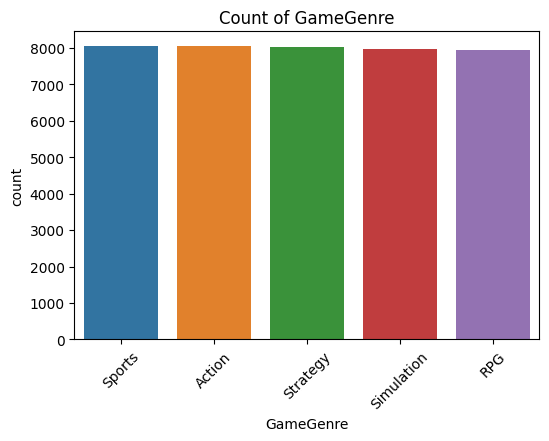

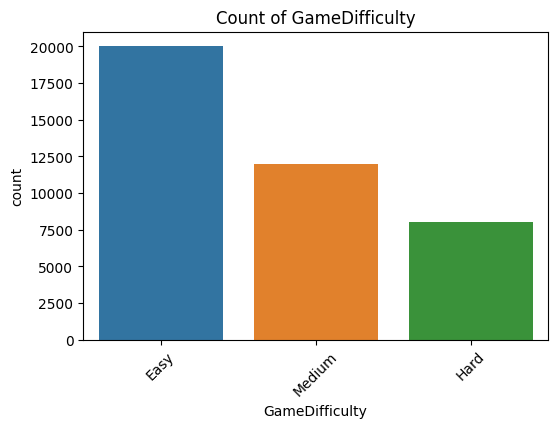

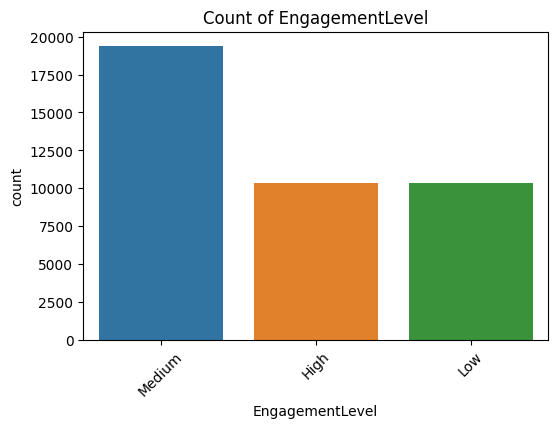

In [6]:
# --- 3. Categorical Counts ---
cat_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=gaming_data, x=col, order=gaming_data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

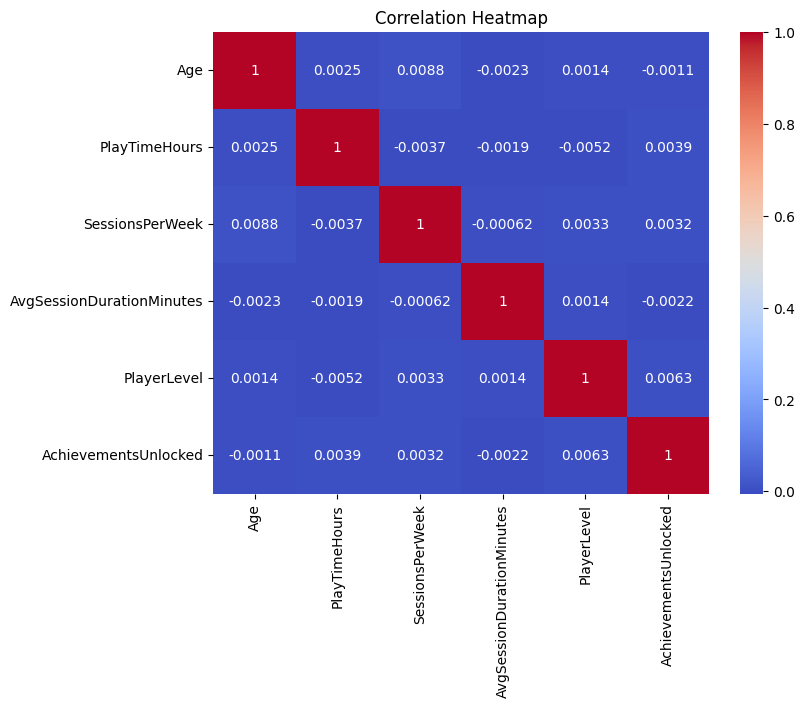

In [24]:
# --- 4. Correlation Heatmap ---
corr = gaming_data[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

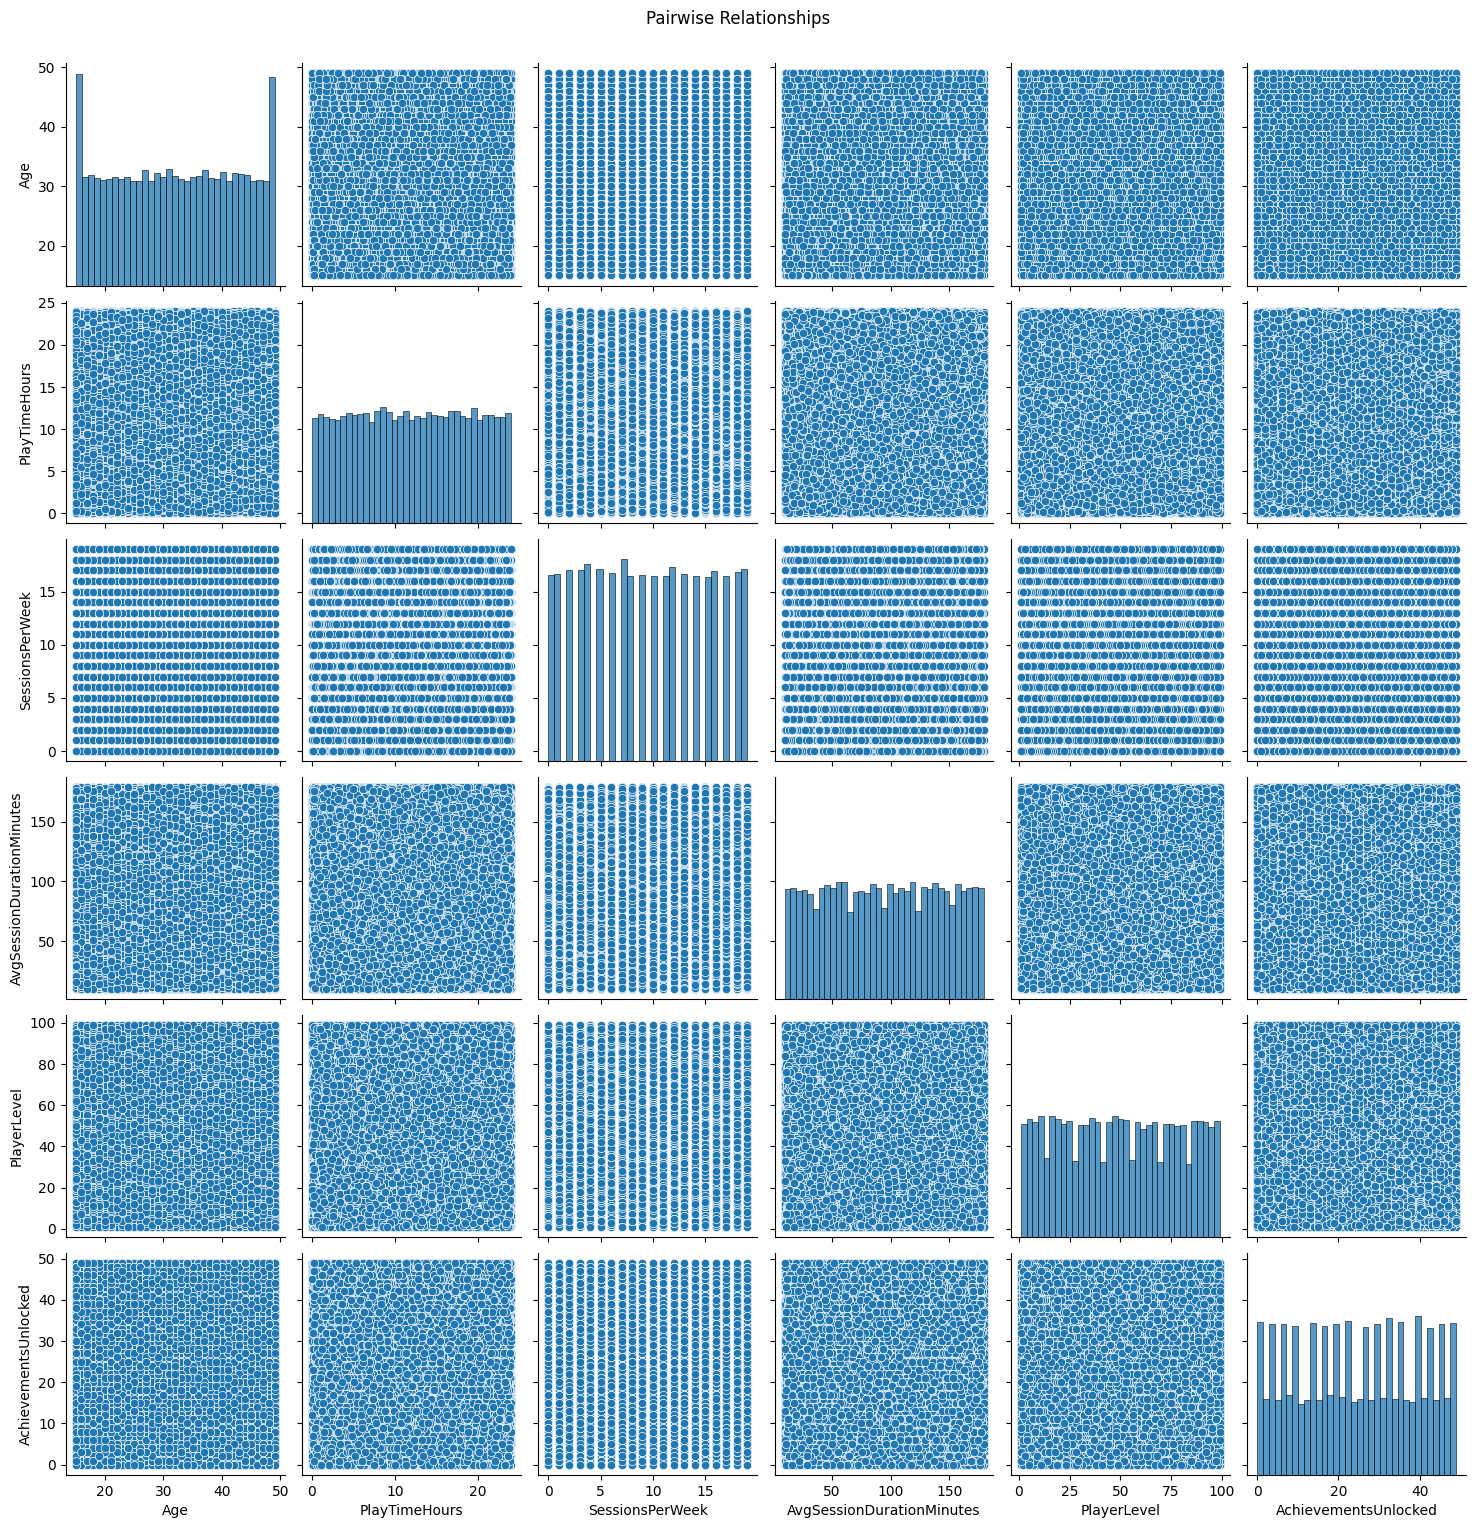

In [7]:
# --- 5. Pairwise Relationships ---
sns.pairplot(gaming_data[num_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

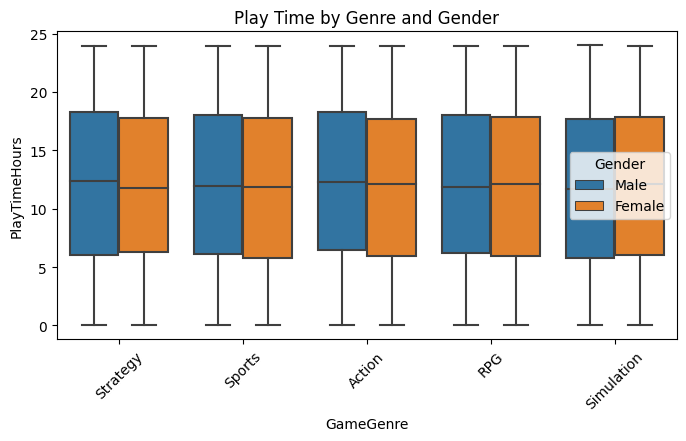

In [8]:
# --- 6. PlayTime by Genre and Gender ---
plt.figure(figsize=(8, 4))
sns.boxplot(data=gaming_data, x='GameGenre', y='PlayTimeHours', hue='Gender')
plt.title('Play Time by Genre and Gender')
plt.xticks(rotation=45)
plt.show()

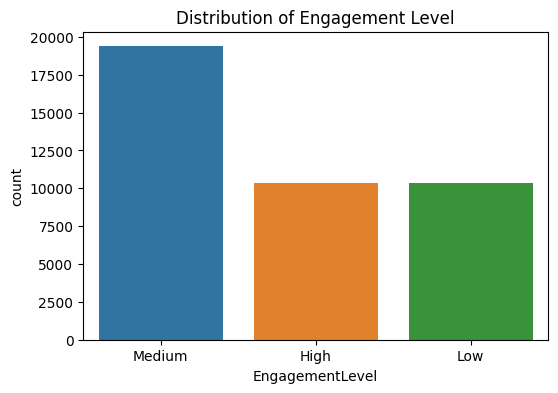

In [9]:
# --- 7. Engagement Level Analysis ---
plt.figure(figsize=(6, 4))
sns.countplot(data=gaming_data, x='EngagementLevel')
plt.title('Distribution of Engagement Level')
plt.show()

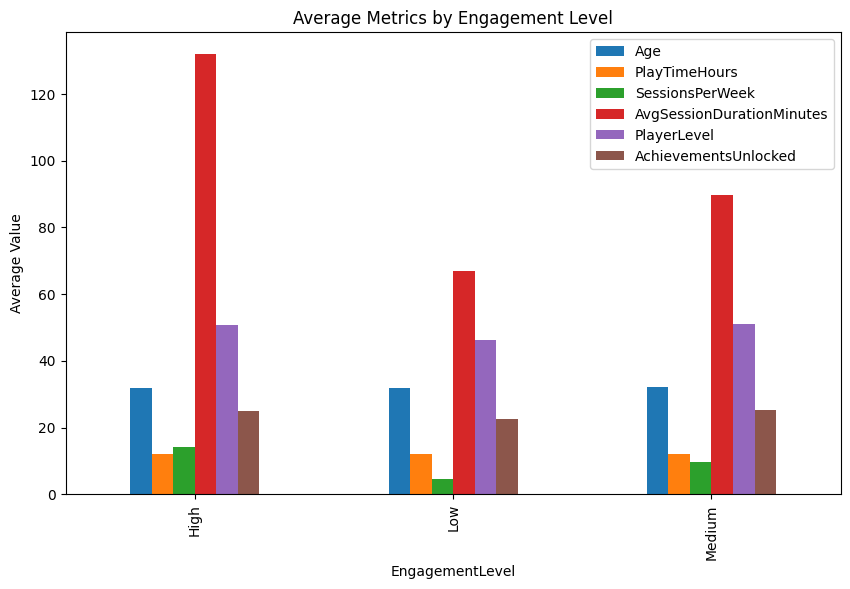

In [10]:
# Grouped mean plots
gaming_data.groupby('EngagementLevel')[num_cols].mean().plot(kind='bar', figsize=(10, 6), title='Average Metrics by Engagement Level')
plt.ylabel('Average Value')
plt.show()

## As we can see,  most of the characteristics are more or less equal in different engagement level, but there is clear difference for average session duration and number of sessions per week. 
## This makes sense: the more sessions you have, and the longer sessions are - the higher engagement level is

# Data preparation

In [16]:
# The column 'PlayerID' is redundant as it contains no useful insights whatsoever, so we will drop it
# Dropping unnecessary column "PlayerID"
gaming_data = gaming_data.drop(axis=1, columns='PlayerID')

In [ ]:
# One-hot encoding "Gender" column
gaming_data = pd.get_dummies(gaming_data, columns=['Gender'])

In [5]:
# Encoding "Game Difficulty" column
replace_diff = {
    'Easy': 0,
    'Medium': 1,
    'Hard': 2
}

gaming_data['GameDifficulty'] = gaming_data['GameDifficulty'].replace(replace_diff)

/tmp/ipykernel_31/151572864.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gaming_data['GameDifficulty'] = gaming_data['GameDifficulty'].replace(replace_diff)


In [7]:
# Manually map EngagementLevel to custom numeric values
level_map = {'Low': 0, 'Medium': 1, 'High': 2}
gaming_data['EngagementLevel_encoded'] = gaming_data['EngagementLevel'].map(level_map)

# Initialize the target encoder and cross-validation splitter
encoder = TargetEncoder(cols=['GameGenre', 'Location'])
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create empty columns to store the encoded values
gaming_data['genre_encoded'] = 0.0
gaming_data['location_encoded'] = 0.0

# Cross-validation loop
for train_idx, val_idx in kf.split(gaming_data):
    # Split the data into training and validation sets
    train_df = gaming_data.iloc[train_idx]
    val_df = gaming_data.iloc[val_idx]
    
    # Fit the encoder only on the training part
    encoder.fit(train_df[['GameGenre', 'Location']], train_df['EngagementLevel_encoded'])
    
    # Transform the validation part using the fitted encoder
    transformed = encoder.transform(val_df[['GameGenre', 'Location']])
    
    # Save the transformed values back into the main dataframe
    gaming_data.loc[val_idx, 'genre_encoded'] = transformed['GameGenre'].values
    gaming_data.loc[val_idx, 'location_encoded'] = transformed['Location'].values

# Dropping initial columns 
gaming_data = gaming_data.drop(axis=1, columns=['Location', 'GameGenre', 'EngagementLevel'])

In [8]:
y = gaming_data['EngagementLevel_encoded']
X = gaming_data.loc[:, gaming_data.columns != 'EngagementLevel_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Display the shapes of the splits for verification
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (36030, 12)
Testing Features Shape: (4004, 12)
Training Target Shape: (36030,)
Testing Target Shape: (4004,)


## Model Training and Evaluation

### Let's try to use different models and then compare the results

In [9]:
# Model Initialization
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight = 'balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42, class_weight = 'balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Random Forest', 'Gradient Boosting', 'LightGBM', 'CatBoost']


Training and evaluating: Random Forest

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1032
           1       0.91      0.95      0.93      1938
           2       0.93      0.88      0.90      1034

    accuracy                           0.92      4004
   macro avg       0.92      0.91      0.91      4004
weighted avg       0.92      0.92      0.92      4004



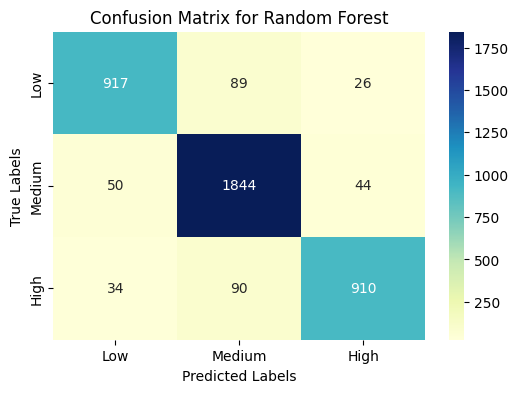

Training and evaluating: Gradient Boosting

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1032
           1       0.90      0.95      0.92      1938
           2       0.93      0.88      0.90      1034

    accuracy                           0.91      4004
   macro avg       0.91      0.90      0.91      4004
weighted avg       0.91      0.91      0.91      4004



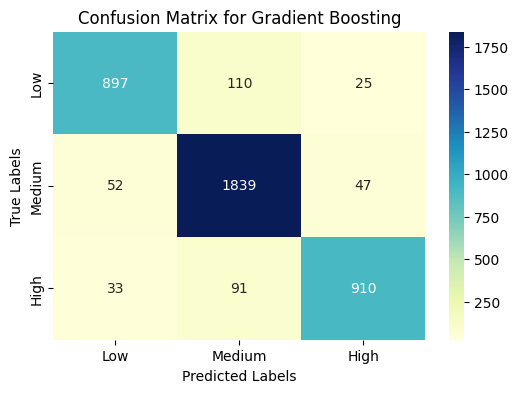

Training and evaluating: LightGBM

Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1032
           1       0.93      0.93      0.93      1938
           2       0.92      0.90      0.91      1034

    accuracy                           0.92      4004
   macro avg       0.91      0.91      0.91      4004
weighted avg       0.92      0.92      0.92      4004



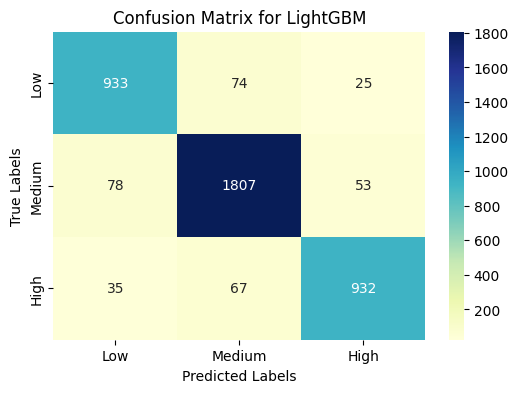

Training and evaluating: CatBoost

Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1032
           1       0.92      0.95      0.94      1938
           2       0.93      0.89      0.91      1034

    accuracy                           0.92      4004
   macro avg       0.92      0.91      0.92      4004
weighted avg       0.92      0.92      0.92      4004



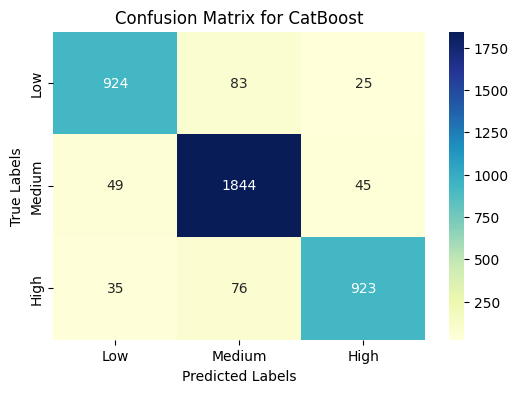


Summary of Model Evaluation:


,Model,Accuracy,AUC
0,CatBoost,0.921828,0.944828
1,LightGBM,0.917083,0.947427
2,Random Forest,0.916833,0.944682
3,Gradient Boosting,0.910589,0.947945


In [10]:
# Initialize results storage
model_results = []

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if y_pred_proba is not None else None
    
    # Store results
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc if auc else "N/A"
    })
    
    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Create a summary table of results
results_df = pd.DataFrame(model_results).sort_values(by="Accuracy", ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Display the summary results
print("\nSummary of Model Evaluation:")
display(results_df)

In [11]:
# Identify the best model based on the highest AUC
best_model_name = results_df.loc[results_df['AUC'].idxmax(), "Model"]
print(f"The best model is: {best_model_name}")
print("\n")

The best model is: Gradient Boosting




### As we can see, we get quite similar results with accuracy around 91-92 and AUC of 94.5 for all models used, but overall Gradient Boosting did a little better than others.

### Ways to improve the results:
### - Add more data
### - Try to change the proportion of data for training and testing
### - Try normalizing or standardizing the data
### - Try different models
### - Try hyperparameter tuning

# Thanks for your attention, please feel free to copy this notebook!